# Пример кластеризации
Мы сгенерируем случайный набор точек, причем мы сразу их сгенерируем так, что они образуют два явных кластера.

[[ 3.04717080e-01 -1.03998411e+00]
 [ 7.50451196e-01  9.40564716e-01]
 [-1.95103519e+00 -1.30217951e+00]
 [ 1.27840403e-01 -3.16242592e-01]
 [-1.68011575e-02 -8.53043928e-01]
 [ 8.79397975e-01  7.77791935e-01]
 [ 6.60306976e-02  1.12724121e+00]
 [ 4.67509342e-01 -8.59292463e-01]
 [ 3.68750784e-01 -9.58882601e-01]
 [ 8.78450301e-01 -4.99259110e-02]
 [-1.84862364e-01 -6.80929544e-01]
 [ 1.22254134e+00 -1.54529482e-01]
 [-4.28327822e-01 -3.52133550e-01]
 [ 5.32309186e-01  3.65444064e-01]
 [ 4.12732612e-01  4.30821003e-01]
 [ 2.14164760e+00 -4.06415016e-01]
 [-5.12242729e-01 -8.13772728e-01]
 [ 6.15979423e-01  1.12897229e+00]
 [-1.13947458e-01 -8.40156477e-01]
 [-8.24481216e-01  6.50592788e-01]
 [ 7.43254171e-01  5.43154268e-01]
 [-6.65509707e-01  2.32161323e-01]
 [ 1.16685809e-01  2.18688597e-01]
 [ 8.71428778e-01  2.23595549e-01]
 [ 6.78913563e-01  6.75790695e-02]
 [ 2.89119399e-01  6.31288226e-01]
 [-1.45715582e+00 -3.19671216e-01]
 [-4.70372654e-01 -6.38877848e-01]
 [-2.75142251e-01  1

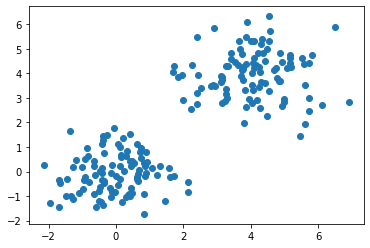

In [53]:
import sklearn as sl
import numpy as np
import matplotlib.pyplot as pp

# инициализируем генератор случайных чисел, число гарантирует повторение случайных
gen = np.random.default_rng(42)

a = gen.normal(  # генерируем в соответствии с нормальным распределением
    [0, 0],  # центр, точка, вокруг которой генерируются случайные
    1,  # стандартное отклонение. чем больше, тем дальше точки могут попадать от центра
    (100, 2)  # 100 точек по две координаты в каждой
)
# еще один набор точек
b = gen.normal([4, 4], 1, (100, 2))
# соединим вместе набор точек a и b. Поставим a над b
c = np.concatenate((a, b))
print(c)
pp.plot(
    c[:, 0],  # x координаты точек
    c[:, 1],  # у координаты точек
    'o'  # рисовать кружочком
)

[[ 3.04717080e-01 -1.03998411e+00  7.50451196e-01 ... -9.97246828e-01
   3.99774227e-01 -9.05479055e-01]
 [-3.78162554e-01  1.29922830e+00 -3.56263971e-01 ... -3.94605123e-01
  -5.12186672e-03 -1.63442899e-01]
 [ 3.37574549e-01  1.40748186e+00  9.05849069e-02 ... -3.71914581e-01
  -1.75672178e+00  3.27995484e-01]
 ...
 [ 4.33432017e+00  4.07037725e+00  2.06929921e+00 ...  5.21170393e+00
   4.10532336e+00  4.35682096e+00]
 [ 3.86604831e+00  2.78567809e+00  4.16450677e+00 ...  3.81902050e+00
   3.35353004e+00  2.91275052e+00]
 [ 3.99055958e+00  4.03875389e+00  3.22617425e+00 ...  4.64450940e+00
   5.13563335e+00  4.26900288e+00]]


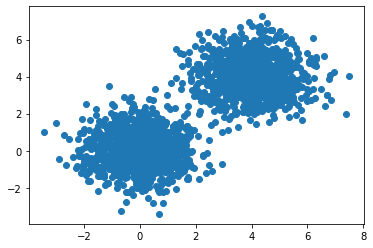

In [60]:
gen = np.random.default_rng(42)

d = 100  # точки содержат по 100 координат (размерность 100)
n = 1000 # 1000 точек в a и в b

a = gen.normal([0] * d, 1, (n, d))
b = gen.normal([4] * d, 1, (n, d))
c = np.concatenate((a, b))

print(c)
# визуализируем, но информация из остальных 98 координат не видна
pp.plot(
    c[:, 0],  # x координаты точек
    c[:, 1],  # у координаты точек
    'o'  # рисовать кружочком
)

# перемешаем точки внутри c
# indices - числа от 0 до 2n-1
indices = list(range(2 * n))  # 2n точек всего
gen.shuffle(indices)
c = c[indices, :]

Уменьшим размерность, до 20 для кластеризации. Кластеризация лучше работает на маленьких размерностях. Потом еще можно уменьшить до 2 для визуализации.

Шаги уменьшения размерности:
1. Сначала надо данные нормализовать, сделать матожидание 0, дисперсию 1. Это выглядит как перемещение данных и их сжатие (растяжение)
2. Применяем PCA (principal component analysis, метод главных компонент)


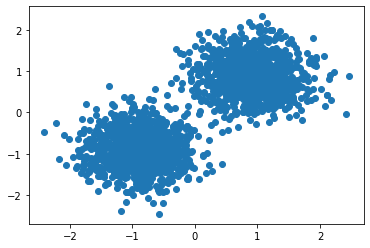

In [61]:
# Нормализация
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# fit — изучаем данные, выичсляем, как их надо сдвинут и растянуть
# transform - преобразовать данные
# fit_transform — это последовательное применение fit, потом transform,
# но работает эффективней
c_scaled = scaler.fit_transform(c)

pp.plot(
    c_scaled[:, 0],  # x координаты точек
    c_scaled[:, 1],  # у координаты точек
    'o'  # рисовать кружочком
)


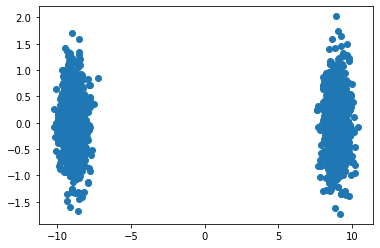

In [62]:
# теперь PCA
from sklearn.decomposition import PCA

pca = PCA(20)  # уменьшаем размерность до 20
c_20 = pca.fit_transform(c_scaled)
pp.plot(
    c_20[:, 0],  # x координаты точек
    c_20[:, 1],  # у координаты точек
    'o'  # рисовать кружочком
)


Наконец, можно кластеризовать


In [63]:
from sklearn.cluster import KMeans

kmeans = KMeans(2)  # хотим два кластера
# fit — как и раньше, это анализ данных, фактическая кластеризация
# predict — преобразование данных, вычисление классов для объектов
clusters = kmeans.fit_predict(c_20)
print(clusters)

[1 0 0 ... 0 1 0]


Мы для каждой точки получили номер ее кластера. Первые точки имеют кластер 1, последние точки имеют кластер 0
Теперь остаётся визуализировать результат. Уменьшим размерность исходных данных до 2


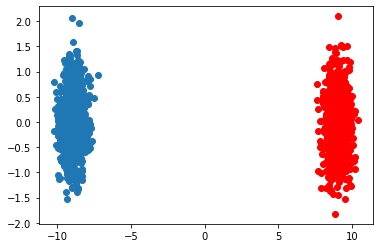

In [64]:
visualization_scaler = StandardScaler()
visualization_pca = PCA(2)
c_scaled = visualization_scaler.fit_transform(c)
c_2 = visualization_pca.fit_transform(c_scaled)

# хочется отдельно выделить точки первого и второго кластеров
c_first_cluster = c_2[clusters == 0, :]
c_second_cluster = c_2[clusters == 1, :]

pp.plot(c_first_cluster[:, 0], c_first_cluster[:, 1], 'o')
pp.plot(c_second_cluster[:, 0], c_second_cluster[:, 1], 'or')


Небольшое отступление об индексировании в numpy:

In [32]:
a = np.array([10, 20, 30, 40, 50])
print(a[3])
print(a[2:4])
print(a[::-1])
# укажем, какие индексы взять
indices = [1, 0, 3, 0, 0, 4]
print(a[indices])

b = np.array([[10, 20], [30, 40], [50, 60], [70, 80], [90, 100]])
print(b)
print(b[[1, 3, 2, 1, 1, 1],:])  # указываем, какие выбрать строки, какие столбцы

40
[30 40]
[50 40 30 20 10]
[20 10 40 10 10 50]
[[ 10  20]
 [ 30  40]
 [ 50  60]
 [ 70  80]
 [ 90 100]]
[[30 40]
 [70 80]
 [50 60]
 [30 40]
 [30 40]
 [30 40]]


In [39]:
# логические вычисления
a = np.array([10, 20, 30, 40, 50])
b = np.array([100, 200, 300, 400, 500])
print(a)
print(b)
print(a + b)
print(a + 1)  # 1 превращается в матрицу из 1, того же размера, что и a

b = np.array([[0, 0, 0, 0, 0], [1, 1, 1, 1, 1], [2, 2, 2, 2, 2]])
print(a + b)

# другие операции типа *, - тоже работают

[10 20 30 40 50]
[100 200 300 400 500]
[110 220 330 440 550]
[11 21 31 41 51]
[[10 20 30 40 50]
 [11 21 31 41 51]
 [12 22 32 42 52]]
[[False False False False False]
 [False False False False False]
 [False False False False False]]


In [44]:
# логические тоже работают:
a = np.array([10, 20, 30, 40, 50])
b = np.array([100, 200, 300, 400, 500])
print(a < b)
print(a > 20)

c = np.array([0, 0, 1, 1, 1, 0, 0])
print(c == 1)

[ True  True  True  True  True]
[False False  True  True  True]
[False False  True  True  True False False]


Логические массивы могут использоваться для индексирования:


In [52]:
inds = a > 20
print(a)
print(inds)
print(a[inds])

# короче
print(a[a > 20])

[10 20 30 40 50]
[False False  True  True  True]
[30 40 50]
[30 40 50]
